### Import Libraries

Found 1930 images belonging to 7 classes.
Found 91 images belonging to 7 classes.
Epoch 1/30


C:\Users\mdzid\anaconda\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


61/61 ━━━━━━━━━━━━━━━━━━━━ 329s 5s/step - accuracy: 0.3966 - loss: 27.0696 - val_accuracy: 0.4725 - val_loss: 1.5549
Epoch 2/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 292s 5s/step - accuracy: 0.7105 - loss: 0.8183 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/30


C:\Users\mdzid\anaconda\lib\contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


61/61 ━━━━━━━━━━━━━━━━━━━━ 297s 5s/step - accuracy: 0.8101 - loss: 0.5190 - val_accuracy: 0.5604 - val_loss: 1.4346
Epoch 4/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 292s 5s/step - accuracy: 0.8672 - loss: 0.3899 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 326s 5s/step - accuracy: 0.9010 - loss: 0.2979 - val_accuracy: 0.5385 - val_loss: 1.5455
Epoch 6/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 302s 5s/step - accuracy: 0.9001 - loss: 0.2773 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 375s 6s/step - accuracy: 0.9465 - loss: 0.1721 - val_accuracy: 0.6154 - val_loss: 1.3660
Epoch 8/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 391s 6s/step - accuracy: 0.9420 - loss: 0.1646 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 9/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 365s 5s/step - accuracy: 0.9244 - loss: 0.2080 - val_accuracy: 0.5934 - val_loss: 1.3575
Epoch 10/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 315s 5s/step - accuracy: 0.9401 - loss: 0.1706 - val_accura

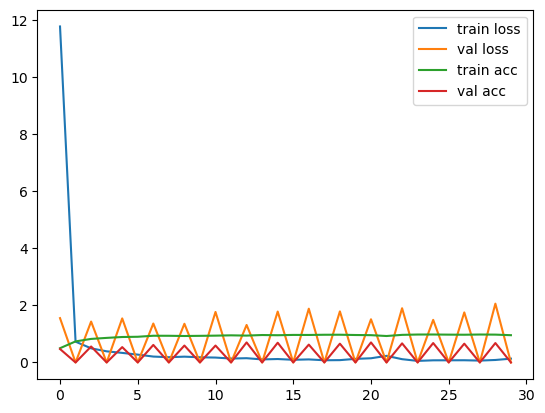

In [7]:
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

IMAGE_SIZE = [299, 299]  # InceptionV3 specific input size
train_path = 'C:/Users/mdzid/Documents/yolo/Dataset/train'
test_path = 'C:/Users/mdzid/Documents/yolo/Dataset/val'

# Creating InceptionV3 Model
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

for layer in inception.layers:
    layer.trainable = False

x = Flatten()(inception.output)
x = Dense(256, activation='relu')(x)
prediction = Dense(7, activation='softmax')(x)
model = Model(inputs=inception.input, outputs=prediction)

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'],
)

# Image Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Train Test Split
training_set = train_datagen.flow_from_directory(
    train_path,
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical'
)

test_set = test_datagen.flow_from_directory(
    test_path,
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical'
)

# Training Model
r = model.fit(
    training_set,
    validation_data=test_set,
    epochs=30,
    validation_steps=len(test_set)
)

# Plotting Loss and Accuracy
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [8]:
from tensorflow.keras.models import load_model
model.save('C:/Users/mdzid/Downloads/cnn/inceptionv3.h5')

In [3]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Load the saved model
model_path = 'C:/Users/mdzid/Downloads/cnn/inceptionv3.h5'
model = load_model(model_path)

# Test data directory
test_dir = 'C:/Users/mdzid/Documents/yolo/Dataset/val'

# ImageDataGenerator for test data
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
    test_dir,
    target_size=(299, 299),
    batch_size=16,
    class_mode='categorical',
    shuffle=False  # Important: Do not shuffle to maintain correspondence with true labels
)

# Get class labels
class_labels = list(test_set.class_indices.keys())

# Initialize counters for each class
class_metrics = {label: {"TP": 0, "FP": 0, "FN": 0} for label in class_labels}

# Iterate over all batches in the test set
for i in range(len(test_set)):
    # Get a batch of images and corresponding true labels
    images, true_labels = test_set[i]
    
    # Make predictions on the batch
    predictions = model.predict(images)
    
    # Get predicted labels (argmax to get the class index)
    predicted_labels = np.argmax(predictions, axis=1)
    
    # Update counters based on batch predictions
    for label_idx, label in enumerate(class_labels):
        true_label_indices = np.where(true_labels[:, label_idx] == 1)[0]
        predicted_label_indices = np.where(predicted_labels == label_idx)[0]
        
        TP = np.sum(np.isin(predicted_label_indices, true_label_indices))
        FP = np.sum(~np.isin(predicted_label_indices, true_label_indices))
        FN = np.sum(~np.isin(true_label_indices, predicted_label_indices))
        
        class_metrics[label]["TP"] += TP
        class_metrics[label]["FP"] += FP
        class_metrics[label]["FN"] += FN

# Print class-wise metrics
for label, metrics in class_metrics.items():
    print(f"Class: {label}")
    print(f"True Positives (TP): {metrics['TP']}")
    print(f"False Positives (FP): {metrics['FP']}")
    print(f"False Negatives (FN): {metrics['FN']}")
    print()


Found 91 images belonging to 7 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
Class: Black Spot
True Positives (TP): 13
False Positives (FP): 4
False Negatives (FN): 7

Class: Cercospora Leaf Spot
True Positives (TP): 5
False Positives (FP): 9
False Negatives (FN): 5

Class: Downy Mildew
True Positives (TP): 13
False Positives (FP): 2
False Negatives (FN): 7

Class: Fresh Leaf
True Positives (TP): 12
False Positives (FP): 0
False Negatives (FN): 2

Class: Powdery Mildew
True Positives (TP): 3
False Positives (FP): 0
False Negatives (FN): 7

Class: Rose Botrytis Blight
True Positives (TP): 6
False Positives (FP): 0
False Negatives (FN): 1

Class: Rose Slug
True Positives (TP): 10
False Positives (FP): 14
False Negatives (FN): 0



In [6]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Load the saved model
model_path = 'C:/Users/mdzid/Downloads/cnn/VGG16.h5'
model = load_model(model_path)

# Test data directory
test_dir = 'C:/Users/mdzid/Documents/yolo/Dataset/val'

# ImageDataGenerator for test data
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    shuffle=False  # Important: Do not shuffle to maintain correspondence with true labels
)

# Get class labels
class_labels = list(test_set.class_indices.keys())

# Initialize counters for each class
class_metrics = {label: {"TP": 0, "FP": 0, "FN": 0} for label in class_labels}

# Iterate over all batches in the test set
for i in range(len(test_set)):
    # Get a batch of images and corresponding true labels
    images, true_labels = test_set[i]
    
    # Make predictions on the batch
    predictions = model.predict(images)
    
    # Get predicted labels (argmax to get the class index)
    predicted_labels = np.argmax(predictions, axis=1)
    
    # Update counters based on batch predictions
    for label_idx, label in enumerate(class_labels):
        true_label_indices = np.where(true_labels[:, label_idx] == 1)[0]
        predicted_label_indices = np.where(predicted_labels == label_idx)[0]
        
        TP = np.sum(np.isin(predicted_label_indices, true_label_indices))
        FP = np.sum(~np.isin(predicted_label_indices, true_label_indices))
        FN = np.sum(~np.isin(true_label_indices, predicted_label_indices))
        
        class_metrics[label]["TP"] += TP
        class_metrics[label]["FP"] += FP
        class_metrics[label]["FN"] += FN

# Print class-wise metrics
for label, metrics in class_metrics.items():
    print(f"Class: {label}")
    print(f"True Positives (TP): {metrics['TP']}")
    print(f"False Positives (FP): {metrics['FP']}")
    print(f"False Negatives (FN): {metrics['FN']}")
    print()


Found 91 images belonging to 7 classes.


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Class: Black Spot
True Positives (TP): 12
False Positives (FP): 3
False Negatives (FN): 8

Class: Cercospora Leaf Spot
True Positives (TP): 3
False Positives (FP): 7
False Negatives (FN): 7

Class: Downy Mildew
True Positives (TP): 12
False Positives (FP): 3
False Negatives (FN): 8

Class: Fresh Leaf
True Positives (TP): 13
False Positives (FP): 0
False Negatives (FN): 1

Class: Powdery Mildew
True Positives (TP): 2
False Positives (FP): 6
False Negatives (FN): 8

Class: Rose Botrytis Blight
True Positives (TP): 3
False Positives (FP): 1
False Negatives (FN): 4

Class: Rose Slug
True Positives (TP): 8
False Positives (FP): 18
False Negatives (FN): 2

